In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imblearn.over_sampling import RandomOverSampler
import numpy as np
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report

In [2]:
#directory_path = '/Users/mahtablashgari/Desktop/Portfolio2024/Protfolio2024/Dataset'
directory_path ='/Users/mahtablashgari/Desktop/Portfolio2024_v2/Dataset'
files_and_dirs = os.listdir(directory_path)
files_and_dirs

['.DS_Store', 'Data_original', 'Data_kaggle']

In [3]:
def show_img(img):
    img= mpimg.imread(img_dir+img)
    imgplot=plt.imshow(img)
    plt.show()

In [12]:
cd 'Dataset/Data_original/dataverse_files'

[Errno 2] No such file or directory: 'Dataset/Data_original/dataverse_files'
/Users/mahtablashgari/Desktop/Portfolio2024_v2/Dataset/Data_original


In [15]:
ls

HAM10000_images/
HAM10000_images_part_1.zip
HAM10000_images_part_2/
HAM10000_images_part_2.zip
HAM10000_metadata.csv
HAM10000_segmentations_lesion_tschandl.zip
ISIC2018_Task3_Test_GroundTruth.csv
ISIC2018_Task3_Test_Images.zip
ISIC2018_Task3_Test_NatureMedicine_AI_Interaction_Benefit.csv


In [16]:
df= pd.read_csv('HAM10000_metadata.csv')
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern


In [17]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


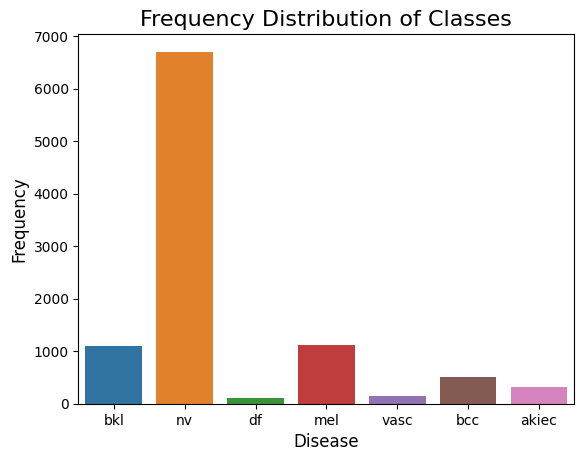

In [18]:
# frequency distribution of different classes (diseases)
sns.countplot(x='dx', data=df)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

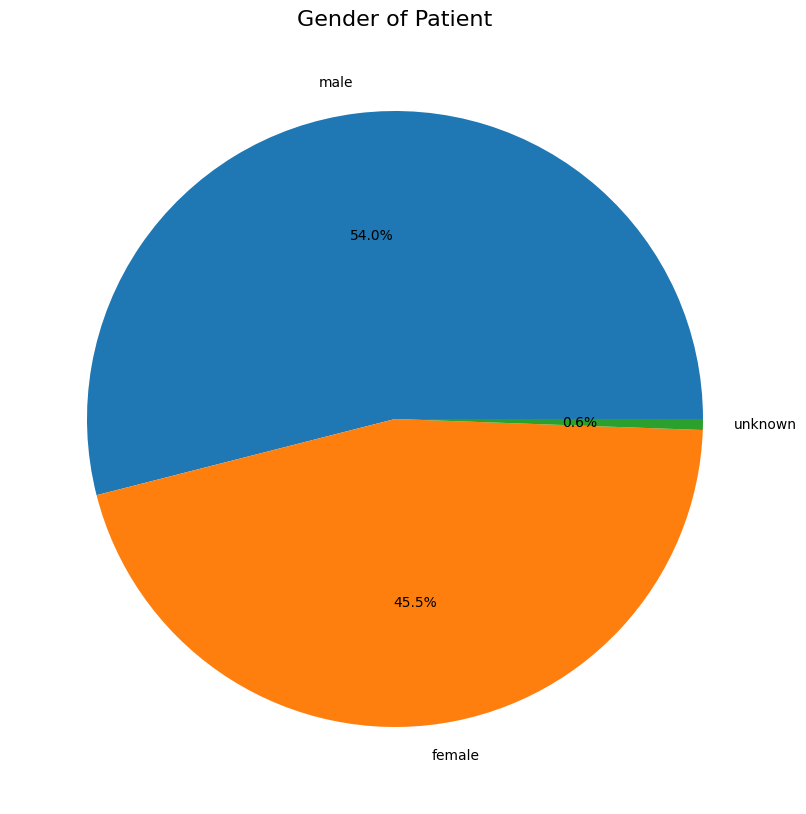

In [19]:
#A pie chart visualizes the gender distribution of patients
bar, ax = plt.subplots(figsize=(10, 10))
plt.pie(df['sex'].value_counts(), labels=df['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

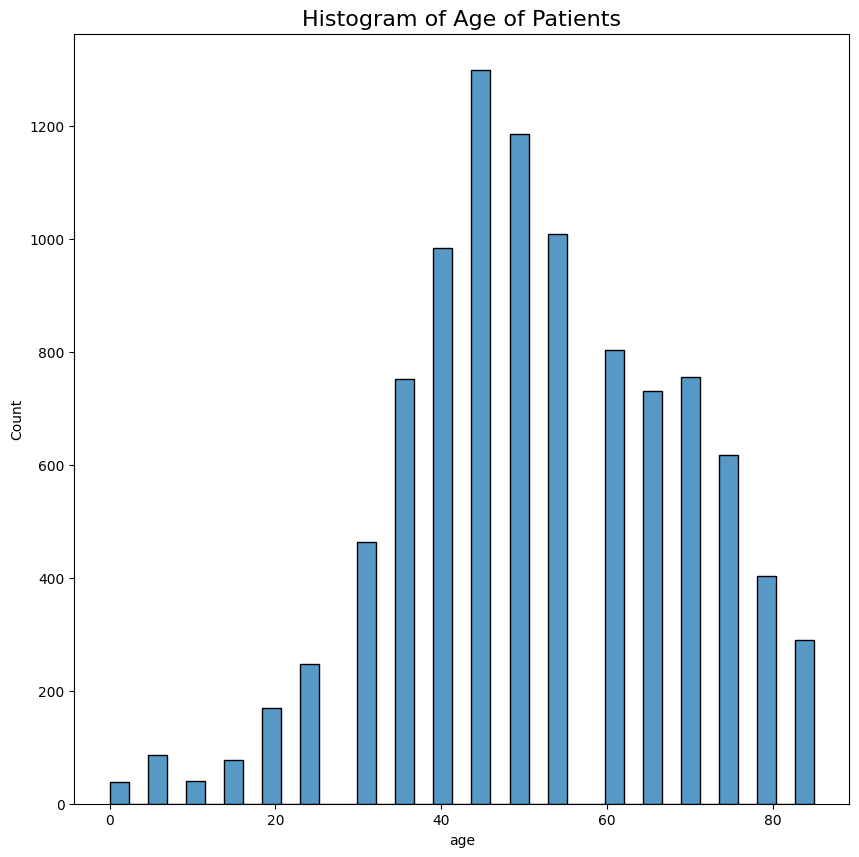

In [20]:
bar, ax = plt.subplots(figsize=(10, 10))
sns.histplot(df['age'])
plt.title('Histogram of Age of Patients', size=16)
plt.show()

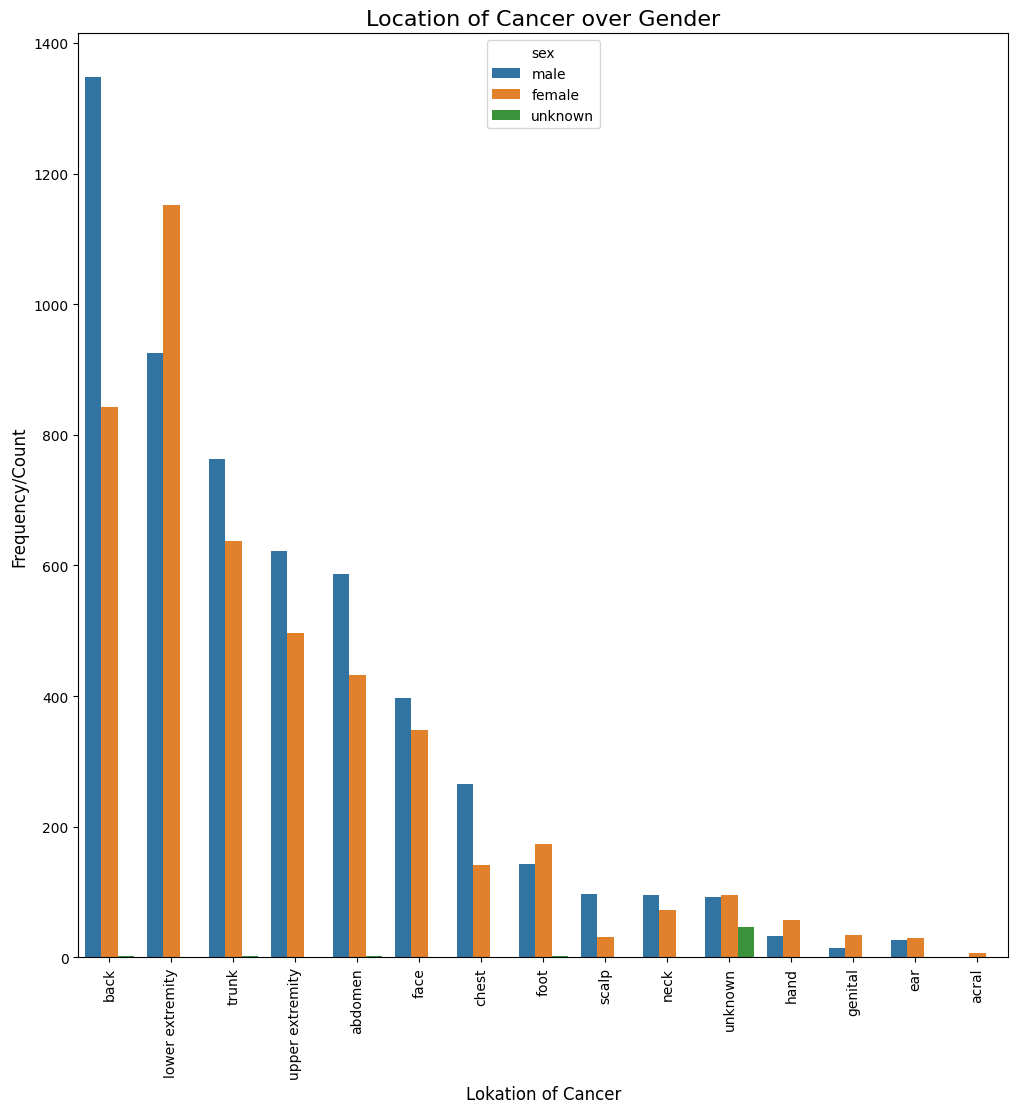

In [36]:
#A bar plot shows the distribution of disease locations across genders
value = df[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'localization': 'location', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='location', y='count', hue='sex', data=temp)
plt.title('Location of Cancer over Gender', size=16)
plt.xlabel('Lokation of Cancer', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation=90)
plt.show()

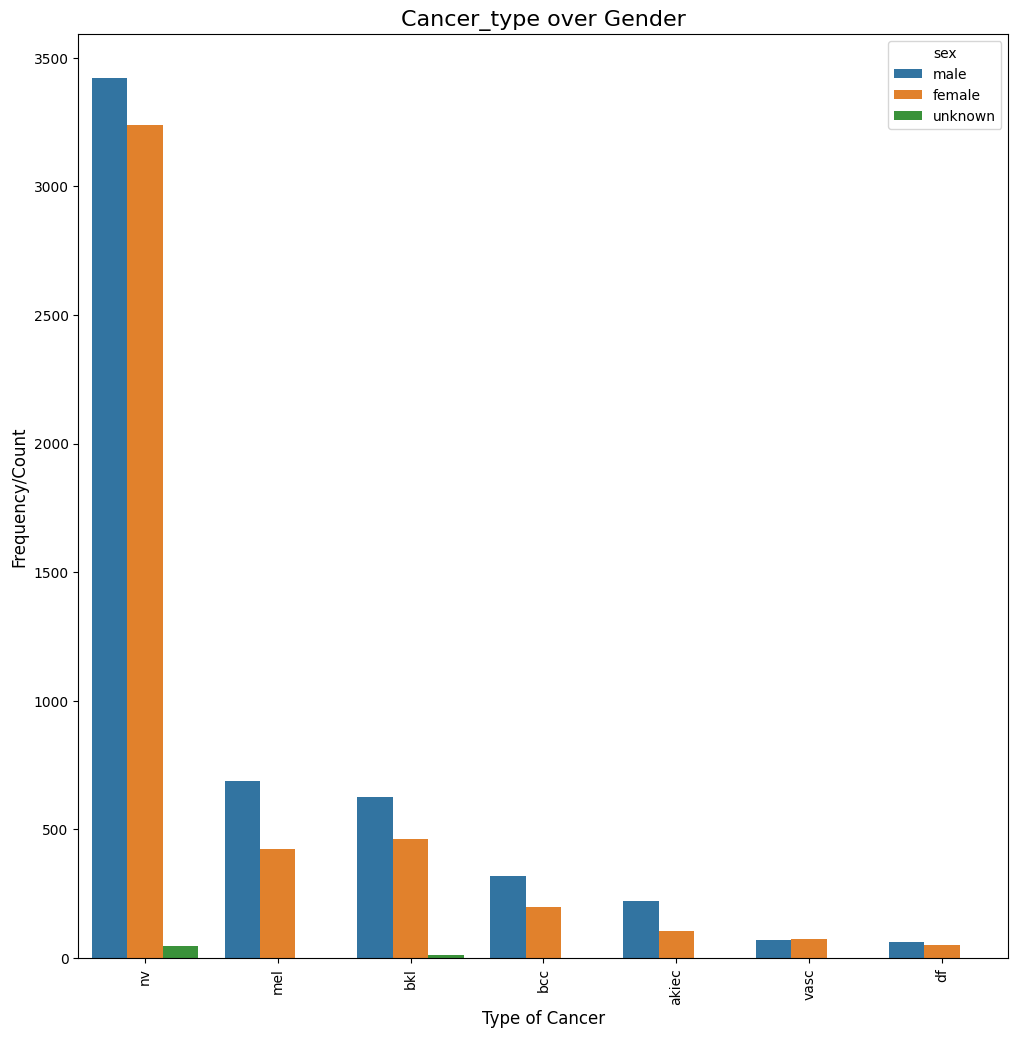

In [37]:
value = df[['dx', 'sex']].value_counts().to_frame()
value.reset_index(level=[1, 0], inplace=True)
temp = value.rename(columns={'dx': 'dx', 0: 'count'})

bar, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x='dx', y='count', hue='sex', data=temp)
plt.title('Cancer_type over Gender', size=16)
plt.xlabel('Type of Cancer', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation=90)
plt.show()

In [22]:
counts = pd.DataFrame(df['dx'].value_counts()).reset_index()
counts

,dx,count
0,nv,6705
1,mel,1113
2,bkl,1099
3,bcc,514
4,akiec,327
5,vasc,142
6,df,115


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


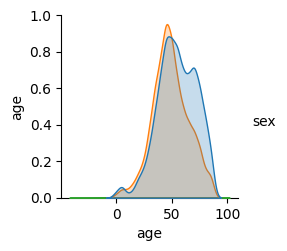

In [23]:
sns.pairplot(df, hue='sex')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


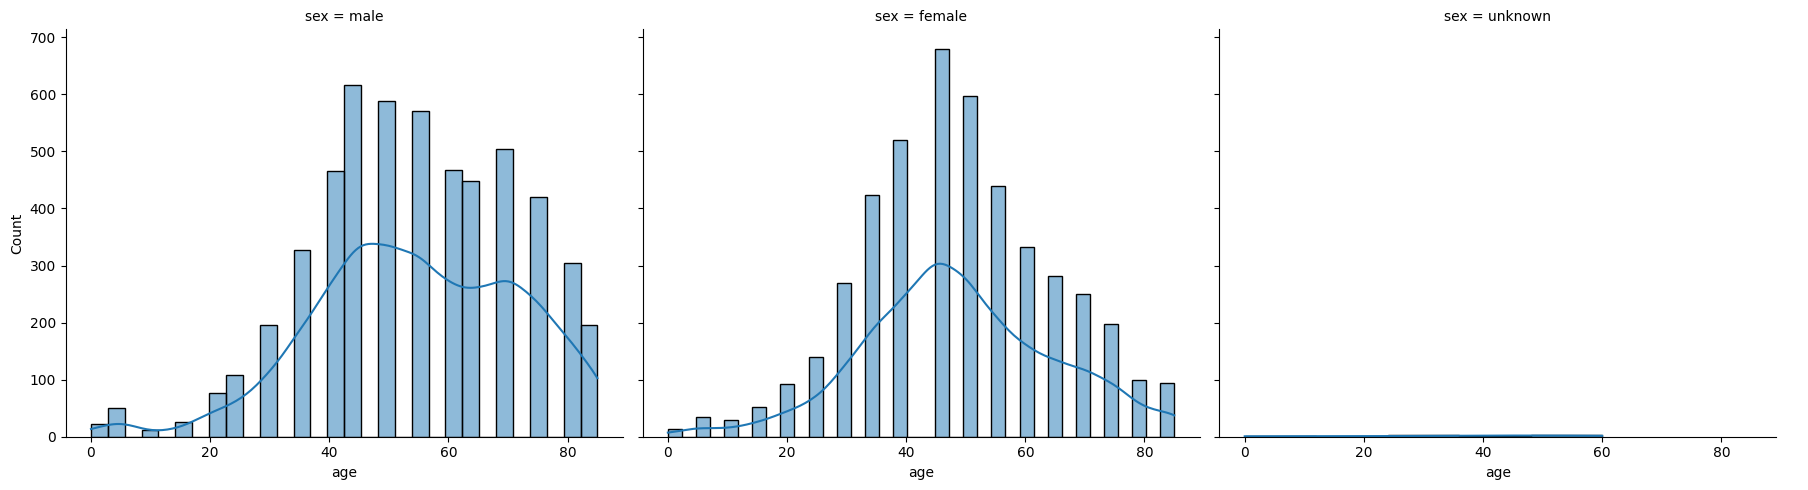

In [24]:
g = sns.FacetGrid(df, col='sex', height=5, aspect=1.2)
g.map(sns.histplot, 'age', kde=True)
g.add_legend()
plt.show()

In [26]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   dataset       10015 non-null  object 
dtypes: float64(1), object(7)
memory usage: 626.1+ KB
None


In [27]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


age    57
dtype: int64


In [33]:
df_cleaned = df.dropna()